# Introduction

In this notebook we present different binary classifiers and compare thier results, We choose to predict High level cancer category so this practice will help us determine the conditions that best discover the cases with High level of cancers.

We will display differnt measurement metrics including sensitivity, so if we managed to have a very accurate calssifier with high sensitivity, we can be sure that if our predection says it's not High level diagnosis then for sure it's not High level, which will give more trust with the patients and hope to get treatment.

# Basic Libraries Import

In [1]:
# Common imports
import numpy as np
import pandas as pd

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

# Load Dataset and explore

In [2]:
#read cancer patient data sets.csv from personal google drive directory and publicly shared
patientsDf=pd.read_csv('https://drive.google.com/uc?id=1-IPjL7WS4lXgYWL7mnmykZ_Z_rvKcolL')

# patientsDf=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datasets/cancer patient data sets.csv')
# original data downloaded from https://www.kaggle.com/datasets/thedevastator/cancer-patients-and-air-pollution-a-new-link

https://www.kaggle.com/datasets/thedevastator/cancer-patients-and-air-pollution-a-new-link

In [3]:
patientsDf.head()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


Each row represents a patient

In [4]:
patientsDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     1000 non-null   int64 
 1   Patient Id                1000 non-null   object
 2   Age                       1000 non-null   int64 
 3   Gender                    1000 non-null   int64 
 4   Air Pollution             1000 non-null   int64 
 5   Alcohol use               1000 non-null   int64 
 6   Dust Allergy              1000 non-null   int64 
 7   OccuPational Hazards      1000 non-null   int64 
 8   Genetic Risk              1000 non-null   int64 
 9   chronic Lung Disease      1000 non-null   int64 
 10  Balanced Diet             1000 non-null   int64 
 11  Obesity                   1000 non-null   int64 
 12  Smoking                   1000 non-null   int64 
 13  Passive Smoker            1000 non-null   int64 
 14  Chest Pain               

No missing data found
All attributes Are Numerical (Ordinal in logic) except Patient Id and Level (which can be considered Ordinal i.e. High, Medium and Low), Age is the only true Numerical Feature excluding the index feature

In [5]:
patientsDf.describe()

,index,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
count,1000.000000,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,37.174000,1.402000,3.8400,4.563000,5.165000,4.840000,4.580000,4.380000,4.491000,...,4.859000,3.856000,3.855000,4.240000,3.777000,3.746000,3.923000,3.536000,3.853000,2.926000
std,288.819436,12.005493,0.490547,2.0304,2.620477,1.980833,2.107805,2.126999,1.848518,2.135528,...,2.427965,2.244616,2.206546,2.285087,2.041921,2.270383,2.388048,1.832502,2.039007,1.474686
min,0.000000,14.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,249.750000,27.750000,1.000000,2.0000,2.000000,4.000000,3.000000,2.000000,3.000000,2.000000,...,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,499.500000,36.000000,1.000000,3.0000,5.000000,6.000000,5.000000,5.000000,4.000000,4.000000,...,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000
75%,749.250000,45.000000,2.000000,6.0000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,...,7.000000,5.000000,6.000000,6.000000,5.000000,5.000000,5.000000,5.000000,6.000000,4.000000
max,999.000000,73.000000,2.000000,8.0000,8.000000,8.000000,8.000000,7.000000,7.000000,7.000000,...,9.000000,9.000000,8.000000,9.000000,8.000000,8.000000,9.000000,7.000000,7.000000,7.000000


You can see that the Categorical features have different scale.
For example:
Air Polution (1 min - 8 max) while
Genetic Risk (1 min - 7 max) while
Fatigue (1 min - 9 max) and so on.

In [6]:
patientsDf["Level"].value_counts()

,count
Level,
High,365
Medium,332
Low,303


# Data Preparation

In [7]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

#le = LabelEncoder()
#patientsDf['Level'] = le.fit_transform(patientsDf['Level'])
y = patientsDf['Level']
X = patientsDf.drop(['Level','index', 'Patient Id'], axis=1, errors='ignore')#ignore to skip non-existent columns in case rerun the code multiple times

num_pipeline = Pipeline([
        ('std_scaler', StandardScaler()),
    ])

X_scaled = num_pipeline.fit_transform(X)

#stratified train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, stratify=y, random_state=42)
y_train_high = (y_train == 'High')
y_test_high = (y_test == 'High')

# k-Nearest Neighbors classifier

Utilize RandomizedSearchCV with cross-validation to find best hyperparameters to use

In [20]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier

param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # p=1 (Manhattan), p=2 (Euclidean)
}

randSearch = RandomizedSearchCV(KNeighborsClassifier(), param_distributions=param_grid_knn, cv=5, n_iter=10, random_state=42);
randSearch.fit(X_train, y_train_high)

print(f'best parameters: {randSearch.best_estimator_}')

best parameters: KNeighborsClassifier(n_neighbors=3, p=1)


display metrics

In [9]:
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

y_pred_KNeighbors = randSearch.predict(X_test)

accuracy = accuracy_score(y_test_high, y_pred_KNeighbors)

report = classification_report(y_test_high, y_pred_KNeighbors, target_names=['High Level', 'Other Levels'])
roc_auc = roc_auc_score(y_test_high, randSearch.predict_proba(X_test)[:, 1], multi_class='ovr')

# Display results
print(f'KNeighbors Accuracy: {accuracy:.2f}')
print(f'KNeighbors ROC-AUC: {roc_auc:.2f}')
print(f'')
print(f'Classification Report for KNeighbors:\n{report}')

KNeighbors Accuracy: 1.00
KNeighbors ROC-AUC: 1.00

Classification Report for KNeighbors:
              precision    recall  f1-score   support

  High Level       1.00      1.00      1.00       191
Other Levels       1.00      1.00      1.00       109

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



Visualize metrics

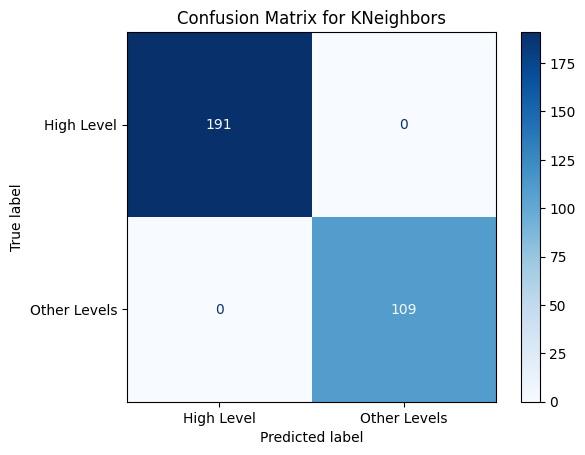

In [10]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Display confusion matrix
cm = confusion_matrix(y_test_high, y_pred_KNeighbors)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['High Level', 'Other Levels'])
disp.plot(cmap='Blues')
plt.title(f'Confusion Matrix for KNeighbors')
plt.show()

# Logistic Regression Classifier

Utilize RandomizedSearchCV with cross-validation to find best hyperparameters to use

In [21]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression

param_grid_lr = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga'],
    'max_iter': [1000, 2000, 3000]
}

randSearchLogistic = RandomizedSearchCV(LogisticRegression(max_iter=1000, random_state=42), param_distributions=param_grid_lr, cv=5, n_iter=10, random_state=42)
randSearchLogistic.fit(X_train, y_train_high)

print(f'best parameters: {randSearchLogistic.best_estimator_}')

best parameters: LogisticRegression(C=100, max_iter=2000, random_state=42, solver='saga')


display metrics

In [12]:
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

y_pred_Logisitic = randSearchLogistic.predict(X_test)

accuracy = accuracy_score(y_test_high, y_pred_Logisitic)

report = classification_report(y_test_high, y_pred_Logisitic, target_names=['High Level', 'Other Levels'])
roc_auc = roc_auc_score(y_test_high, randSearchLogistic.predict_proba(X_test)[:, 1], multi_class='ovr')

#Display results
print(f'LogisticRegression Accuracy: {accuracy:.2f}')
print(f'LogisticRegression ROC-AUC: {roc_auc:.2f}')
print(f'')
print(f'Classification Report for LogisticRegression:\n{report}')

LogisticRegression Accuracy: 1.00
LogisticRegression ROC-AUC: 1.00

Classification Report for LogisticRegression:
              precision    recall  f1-score   support

  High Level       1.00      1.00      1.00       191
Other Levels       1.00      1.00      1.00       109

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



Visualize metrics

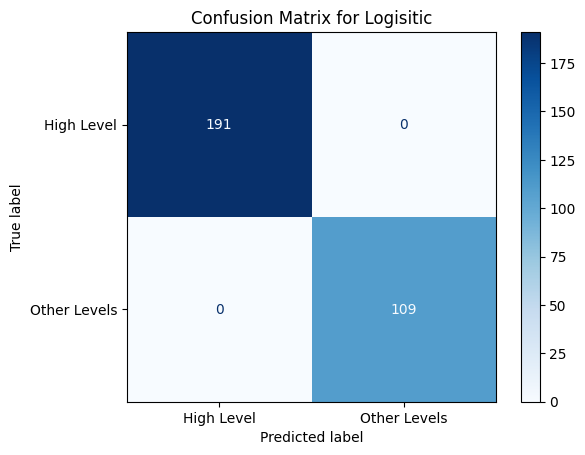

In [13]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

#Display confusion matrix
cm = confusion_matrix(y_test_high, y_pred_Logisitic)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['High Level', 'Other Levels'])
disp.plot(cmap='Blues')
plt.title(f'Confusion Matrix for Logisitic')
plt.show()

# Naive Bayes classifier

In [14]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

bayes = GaussianNB()
bayes.fit(X_train, y_train_high)

y_pred_bayes = bayes.predict(X_test)

accuracy = accuracy_score(y_test_high, y_pred_bayes)

report = classification_report(y_test_high, y_pred_bayes, target_names=['High Level', 'Other Levels'])
roc_auc = roc_auc_score(y_test_high, bayes.predict_proba(X_test)[:, 1], multi_class='ovr')

#Display results
print(f'naive_bayes Accuracy: {accuracy:.2f}')
print(f'naive_bayes ROC-AUC: {roc_auc:.2f}')
print(f'')
print(f'Classification Report for naive_bayes:\n{report}')

naive_bayes Accuracy: 0.91
naive_bayes ROC-AUC: 1.00

Classification Report for naive_bayes:
              precision    recall  f1-score   support

  High Level       0.99      0.87      0.92       191
Other Levels       0.81      0.98      0.89       109

    accuracy                           0.91       300
   macro avg       0.90      0.93      0.91       300
weighted avg       0.92      0.91      0.91       300



Visualize metrics

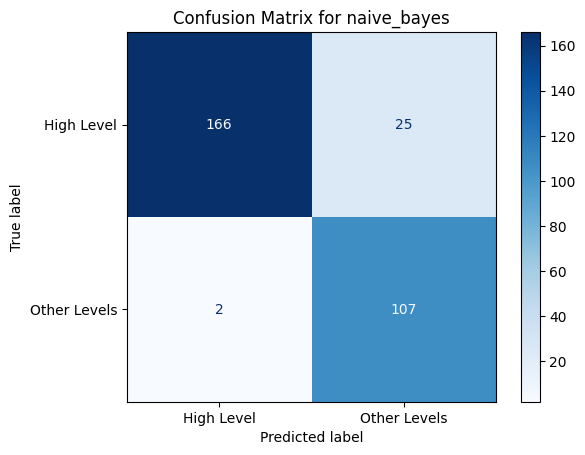

In [15]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

#Display confusion matrix
cm = confusion_matrix(y_test_high, y_pred_bayes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['High Level', 'Other Levels'])
disp.plot(cmap='Blues')
plt.title(f'Confusion Matrix for naive_bayes')
plt.show()

# Stochastic Gradient Descent (SGD)

use Grid search

In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier

param_grid_sgd = {
    'max_iter': [1000, 2000, 3000],
    'loss': ['log_loss', 'modified_huber']
}

gridSearchSGD = GridSearchCV(SGDClassifier(max_iter=1000, random_state=42, loss='log_loss'),
                             param_grid=param_grid_sgd,
                             cv=5)
gridSearchSGD.fit(X_train, y_train_high)

print(f'best parameters: {gridSearchSGD.best_estimator_}')

best parameters: SGDClassifier(loss='log_loss', random_state=42)


metrics display

In [17]:
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

y_pred_SGD = gridSearchSGD.predict(X_test)

accuracy = accuracy_score(y_test_high, y_pred_SGD)

report = classification_report(y_test_high, y_pred_SGD, target_names=['High Level', 'Other Levels'])
roc_auc = roc_auc_score(y_test_high, gridSearchSGD.predict_proba(X_test)[:, 1], multi_class='ovr')

#Display results
print(f'SGD Accuracy: {accuracy:.2f}')
print(f'SGD ROC-AUC: {roc_auc:.2f}')
print(f'')
print(f'Classification Report for SGD:\n{report}')

SGD Accuracy: 1.00
SGD ROC-AUC: 1.00

Classification Report for SGD:
              precision    recall  f1-score   support

  High Level       0.99      1.00      1.00       191
Other Levels       1.00      0.99      1.00       109

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



visualize metrics

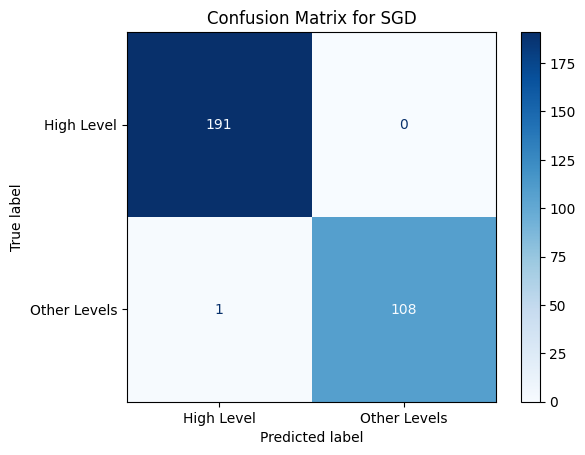

In [18]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

#Display confusion matrix
cm = confusion_matrix(y_test_high, y_pred_SGD)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['High Level', 'Other Levels'])
disp.plot(cmap='Blues')
plt.title(f'Confusion Matrix for SGD')
plt.show()

# Classifiers ROC AUC comparison visualization

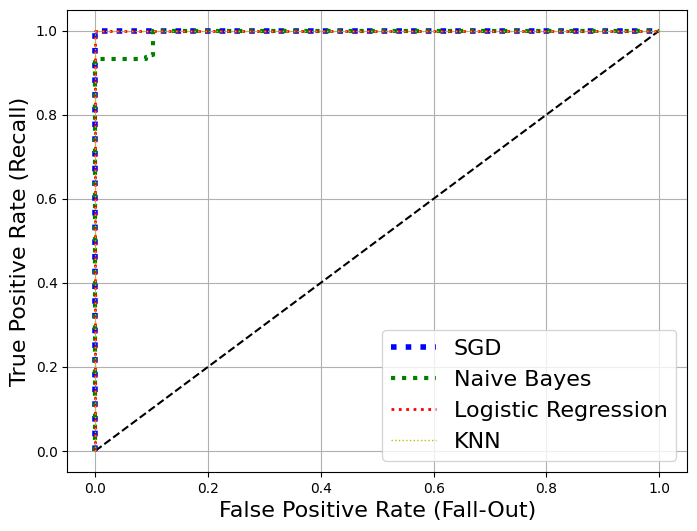

In [23]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_curve

SGD = SGDClassifier(loss='log_loss', random_state=42)
y_probas_SGD = cross_val_predict(SGD, X_train, y_train_high, cv=5, method="predict_proba")
fpr_SGD, tpr_SGD, thresholds_SGD = roc_curve(y_train_high, y_probas_SGD[:,1])


bayes = GaussianNB()
#bayes.fit(X_train, y_train_high)
y_probas_bayes = cross_val_predict(bayes, X_train, y_train_high, cv=5, method="predict_proba")
fpr_bayes, tpr_bayes, thresholds_bayes = roc_curve(y_train_high, y_probas_bayes[:,1])

lr = LogisticRegression(C=100, max_iter=2000, random_state=42, solver='saga')
y_probas_lr = cross_val_predict(lr, X_train, y_train_high, cv=5, method="predict_proba")
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_train_high, y_probas_lr[:,1])

knn = KNeighborsClassifier(n_neighbors=3, p=1)
y_probas_knn = cross_val_predict(knn, X_train, y_train_high, cv=5, method="predict_proba")
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_train_high, y_probas_knn[:,1])

#plot figure
plt.figure(figsize=(8, 6))                         # Not shown
plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
plt.plot(fpr_SGD, tpr_SGD, "b:", linewidth=4, label="SGD")
plt.plot(fpr_bayes, tpr_bayes, "g:", linewidth=3, label="Naive Bayes")
plt.plot(fpr_lr, tpr_lr, "r:", linewidth=2, label="Logistic Regression")
plt.plot(fpr_knn, tpr_knn, "y:", linewidth=1, label="KNN")

#plot_roc_curve(fpr_SGD, tpr_SGD)
# plt.plot([4.837e-3, 4.837e-3], [0., 0.4368], "r:") # Not shown
# plt.plot([0.0, 4.837e-3], [0.4368, 0.4368], "r:")  # Not shown
# plt.plot([4.837e-3], [0.4368], "ro")               # Not shown
plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) # Not shown
plt.ylabel('True Positive Rate (Recall)', fontsize=16)    # Not shown
plt.grid(True)
plt.legend(loc="lower right", fontsize=16)
plt.show()



# Conclusion and final remarks

Summary


*   KNN Classifier: Achieved perfect accuracy and ROC-AUC. However, KNN's overfitting potential should be evaluated on larger, more varied datasets.
*   Logistic Regression: Also perfect performance, likely due to data suitability for linear separability.
*   Naive Bayes: Slightly lower accuracy but retains a strong ROC-AUC, showcasing robustness in probabilistic classification.
*   SGD Classifier: Performed exceptionally well, matching logistic regression with its flexible linear model.